In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("login_hours.csv")
df = df.sort_values(by=['car_number','active_date'],ascending=[True,True])
df = df[df.category != "bike_delivery"]
df = df[df.category != "bike"]
df = df[df.category != "ets_ola"]
df = df[df.category != "electric_vehicle"]
df = df[df.category != "sedan"]
df = df[df.category != "auto"]
df = df[df.category != "exec"]

In [3]:
df["category"] = df["category"].map({'prime':"prime",'prime_play':"prime",'mini':"mini",'economy_suv':"economy_suv",'micro':"micro",'exec':"exec"})
df["category"].value_counts()

prime          338936
mini           133619
economy_suv     39225
micro            7652
Name: category, dtype: int64

In [4]:
df = df[df.active_date>='2018-11-05']
number_of_days = df["car_number"].value_counts()
number_of_days = number_of_days.sort_index()
total_login_hours = df.groupby(["car_number"])["login_hours"].sum()
total_login_hours = total_login_hours.sort_index()
df1 = pd.concat([number_of_days,total_login_hours],axis=1)
df1.columns = ['number_of_days', 'total_login_hours']
df1["login_hours_per_day"] = df1["total_login_hours"]/df1["number_of_days"]
df1["number_of_days/28"] = df1["number_of_days"]/28

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1)
scaled_features = scaler.transform(df1)
df_feat = pd.DataFrame(scaled_features,columns=df1.columns)
df_feat.head()

,number_of_days,total_login_hours,login_hours_per_day,number_of_days/28
0,-1.453898,-0.912758,-1.110724,-1.453898
1,1.084719,0.637707,0.398857,1.084719
2,0.853936,0.281936,0.123455,0.853936
3,-0.415373,-0.854502,-1.204336,-0.415373
4,-0.646156,-0.390025,0.366802,-0.646156


1    7345
0    5933
2    3401
Name: labels, dtype: int64

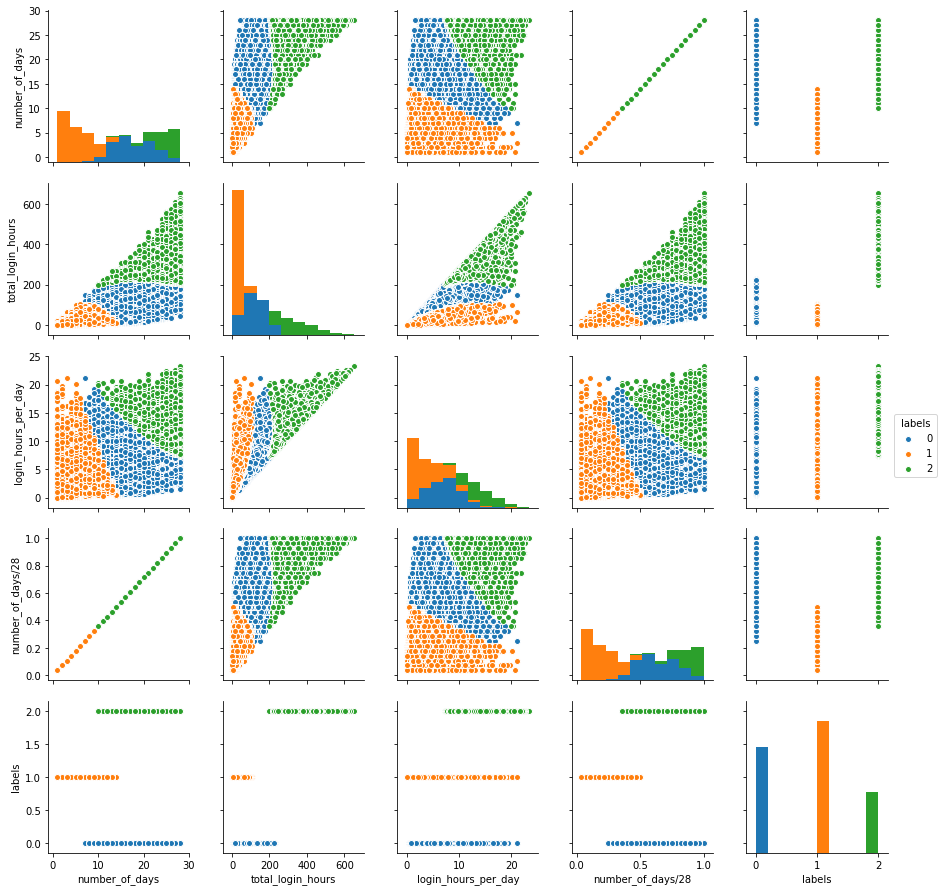

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_feat.values)
df1["labels"] = kmeans.labels_
sns.pairplot(df1,hue="labels")
print("\n")
df1["labels"].value_counts()

In [8]:
tdf = pd.read_csv("login_hours.csv")
tdf = tdf.sort_values(by=['car_number','active_date'],ascending=[True,True])
tdf = tdf[tdf.category != "bike_delivery"]
tdf = tdf[tdf.category != "bike"]
tdf = tdf[tdf.category != "ets_ola"]
tdf = tdf[tdf.category != "electric_vehicle"]
tdf = tdf[tdf.category != "sedan"]
tdf = tdf[tdf.category != "auto"]
tdf = tdf[tdf.category != "exec"]
tdf["category"] = tdf["category"].map({'prime':"prime",'prime_play':"prime",'mini':"mini",'economy_suv':"economy_suv",'micro':"micro",'exec':"exec"})
tdf = tdf[tdf.wk == 44]
t_number_of_days = tdf["car_number"].value_counts()
t_number_of_days = t_number_of_days.sort_index()
t_total_login_hours = tdf.groupby(["car_number"])["login_hours"].sum()
t_total_login_hours = t_total_login_hours.sort_index()
tdf1 = pd.concat([t_number_of_days,t_total_login_hours],axis=1)
tdf1.columns = ['number_of_days', 'total_login_hours']
tdf1["attendancep"] = tdf1["number_of_days"]/7
tdf1["login_hours_per_day"] = tdf1["total_login_hours"]/tdf1["number_of_days"]
tdf1.describe()

,number_of_days,total_login_hours,attendancep,login_hours_per_day
count,13581.000000,13581.000000,13581.000000,13581.000000
mean,4.529416,40.615788,0.647059,7.569839
std,2.096485,37.404073,0.299498,5.383849
min,1.000000,0.003056,0.142857,0.003056
25%,3.000000,8.315833,0.428571,2.821111
50%,5.000000,30.333056,0.714286,7.175556
75%,6.000000,64.152778,0.857143,11.381944
max,7.000000,172.675000,1.000000,24.667857


In [9]:
cluster1df = df1[df1.labels == 1]
cluster2df = df1[df1.labels == 0]
cluster3df = df1[df1.labels == 2]

In [11]:
ptdf = tdf1.loc[cluster1df.index.values]
atdf = tdf1.loc[cluster2df.index.values]
ftdf = tdf1.loc[cluster3df.index.values]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/sta

In [12]:
ptdf.describe()

,number_of_days,total_login_hours,attendancep,login_hours_per_day
count,4352.000000,4352.000000,4352.000000,4352.000000
mean,3.327206,17.614848,0.475315,4.314677
std,1.904648,22.002989,0.272093,3.929276
min,1.000000,0.004167,0.142857,0.004167
25%,2.000000,2.226944,0.285714,1.061528
50%,3.000000,8.766806,0.428571,3.064479
75%,5.000000,24.748264,0.714286,6.823056
max,7.000000,156.429444,1.000000,22.347063


In [13]:
atdf.describe()

,number_of_days,total_login_hours,attendancep,login_hours_per_day
count,5135.000000,5135.000000,5135.000000,5135.000000
mean,4.998247,37.298575,0.714035,7.046450
std,1.765961,26.125928,0.252280,3.912416
min,1.000000,0.003056,0.142857,0.003056
25%,4.000000,15.758194,0.571429,3.907123
50%,5.000000,33.758611,0.714286,7.087381
75%,6.000000,54.292222,0.857143,9.743380
max,7.000000,167.769722,1.000000,23.967103


In [20]:
ftdf.describe()

,number_of_days,total_login_hours,attendancep,login_hours_per_day
count,3224.000000,3224.000000,3224.000000,3224.000000
mean,6.014578,84.701917,0.859225,13.767124
std,1.461717,34.261108,0.208817,4.009873
min,1.000000,0.026111,0.142857,0.026111
25%,6.000000,61.464931,0.857143,11.202649
50%,7.000000,85.952500,1.000000,13.737937
75%,7.000000,109.511250,1.000000,16.534921
max,7.000000,172.675000,1.000000,24.667857
